In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
from qubit_templates import *
from functions import *
from ChipDesign import *

# Read configuration file

In [3]:
outname = "TcSampleDesign_grid"

config = load_config( f"config/common_Tc.yaml" )

# Wafer design

In [4]:
wafer = device_Wafer(config)

# Place chip designs

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


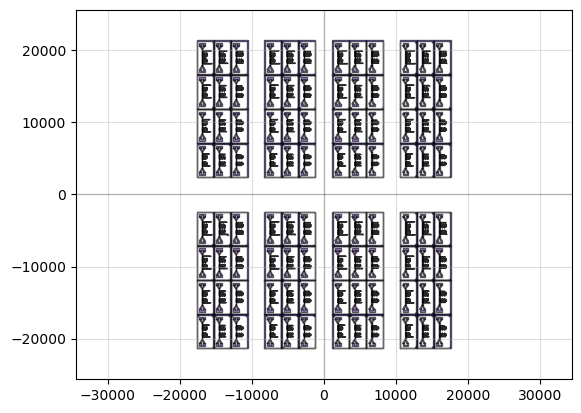

In [5]:
D = sweep_chipdesign( config )
D.center = (0,0)

wafer.add_ref(D)
qp(D)


# Add grid lines

15 9


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


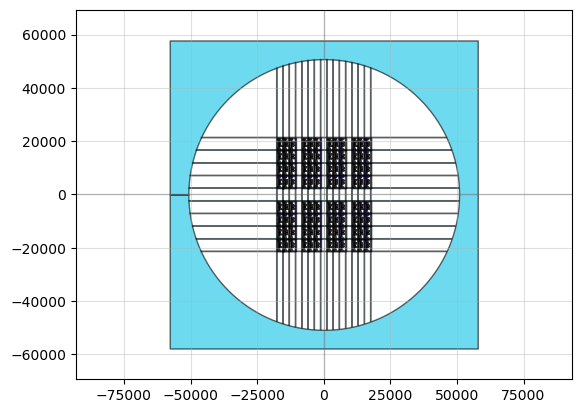

In [6]:
grid = device_Grid(config)
wafer.add_ref( grid )

qp(wafer)


In [7]:
wafer.write_gds('output/' + outname)

'output/TcSampleDesign_grid.gds'